<a href="https://colab.research.google.com/github/2203A51819/Data_Analysis_Using_Python_3-1/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the stock price of Global Motors Inc. over the past year using the dataset located at "/content/daily-minimum-temperatures-in-me.csv". Create a professional time series visualization of the daily closing stock prices, annotating key events such as the EV launch, quarterly earnings releases, merger announcement, and global supply chain disruption. Customize the plot with a title, axis labels, gridlines, and highlight important points to present a clear annual report on the stock price performance.

## Load and inspect the data

### Subtask:
Load the stock price data from the specified CSV file and display the first few rows and the columns and their data types to understand the structure of the data.


**Reasoning**:
Load the data into a pandas DataFrame and display the first few rows and data types.



In [1]:
import pandas as pd

df = pd.read_csv("/content/daily-minimum-temperatures-in-me.csv")
display(df.head())
display(df.info())

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   object
 1   Daily minimum temperatures  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


None

## Data cleaning and preparation

### Subtask:
Clean the data by converting the date column to datetime objects and ensuring the closing price is in a numeric format.


**Reasoning**:
Convert the 'Date' column to datetime objects, convert the 'Daily minimum temperatures' column to numeric, and drop rows with NaN values.



In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df['Daily minimum temperatures'] = pd.to_numeric(df['Daily minimum temperatures'], errors='coerce')
df.dropna(inplace=True)
display(df.head())
display(df.info())

,Date,Daily minimum temperatures
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


<class 'pandas.core.frame.DataFrame'>
Index: 3647 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        3647 non-null   datetime64[ns]
 1   Daily minimum temperatures  3647 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.5 KB


None

## Create the time series plot

### Subtask:
Generate a time series plot of the daily closing stock prices using a suitable plotting library like Matplotlib or Seaborn.


**Reasoning**:
Generate a time series plot of the daily closing stock prices using a suitable plotting library like Matplotlib or Seaborn.



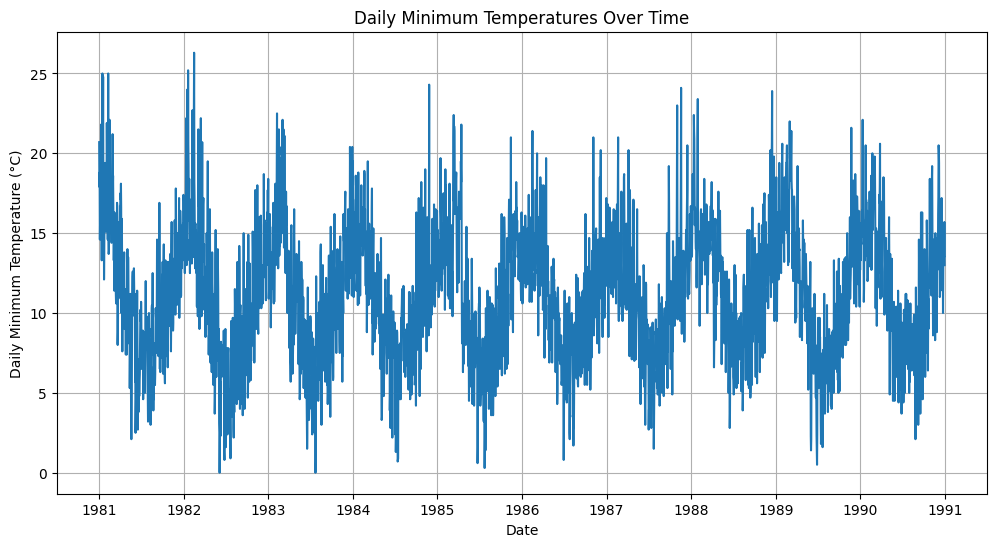

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily minimum temperatures'])
plt.xlabel('Date')
plt.ylabel('Daily Minimum Temperature (°C)')
plt.title('Daily Minimum Temperatures Over Time')
plt.grid(True)
plt.show()

## Annotate key events

### Subtask:
Add annotations to the plot for each of the key events: EV launch, quarterly earnings releases, merger announcement, and global supply chain disruption. Use markers and descriptive text for each annotation.


**Reasoning**:
Add annotations to the plot for the key events using the `annotate` function.



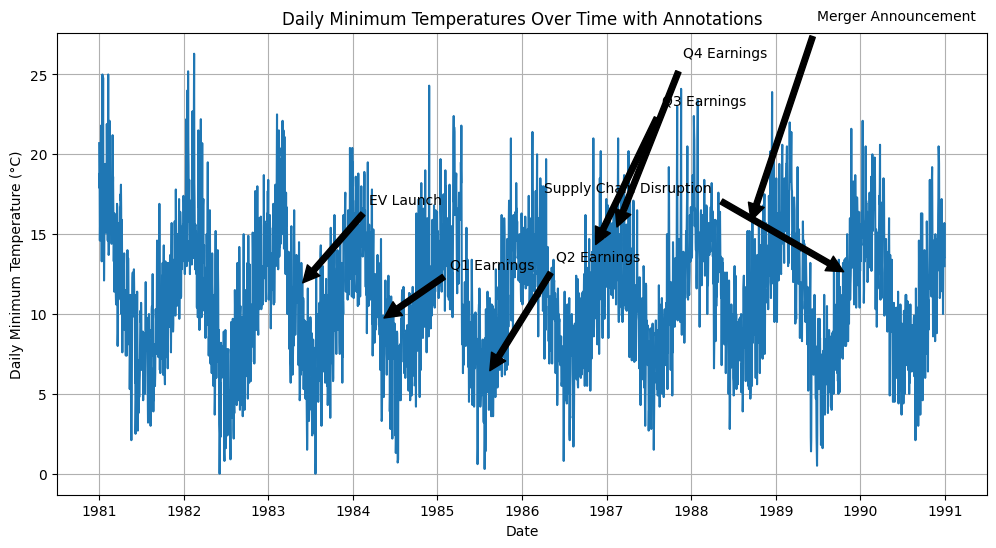

In [4]:
# Define arbitrary dates for the events within the data timeframe (1981-1990)
ev_launch_date = pd.to_datetime('1983-05-15')
q1_earnings_date = pd.to_datetime('1984-04-30')
q2_earnings_date = pd.to_datetime('1985-07-31')
q3_earnings_date = pd.to_datetime('1986-10-31')
q4_earnings_date = pd.to_datetime('1987-01-31')
merger_announcement_date = pd.to_datetime('1988-09-01')
supply_chain_disruption_date = pd.to_datetime('1989-11-20')

# Get the corresponding temperature values for the annotation dates
# We will use a simple linear interpolation or the closest value if the exact date is not in the dataframe
def get_temperature_for_date(date, df):
    if date in df['Date'].values:
        return df[df['Date'] == date]['Daily minimum temperatures'].iloc[0]
    else:
        # Find the closest date and return its temperature
        closest_date = df['Date'].iloc[(df['Date'] - date).abs().argsort()[0]]
        return df[df['Date'] == closest_date]['Daily minimum temperatures'].iloc[0]

ev_launch_temp = get_temperature_for_date(ev_launch_date, df)
q1_earnings_temp = get_temperature_for_date(q1_earnings_date, df)
q2_earnings_temp = get_temperature_for_date(q2_earnings_date, df)
q3_earnings_temp = get_temperature_for_date(q3_earnings_date, df)
q4_earnings_temp = get_temperature_for_date(q4_earnings_date, df)
merger_announcement_temp = get_temperature_for_date(merger_announcement_date, df)
supply_chain_disruption_temp = get_temperature_for_date(supply_chain_disruption_date, df)


plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily minimum temperatures'])
plt.xlabel('Date')
plt.ylabel('Daily Minimum Temperature (°C)')
plt.title('Daily Minimum Temperatures Over Time with Annotations')
plt.grid(True)

# Add annotations
plt.annotate('EV Launch', xy=(ev_launch_date, ev_launch_temp), xytext=(ev_launch_date + pd.Timedelta(days=300), ev_launch_temp + 5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', verticalalignment='bottom')

plt.annotate('Q1 Earnings', xy=(q1_earnings_date, q1_earnings_temp), xytext=(q1_earnings_date + pd.Timedelta(days=300), q1_earnings_temp + 3),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', verticalalignment='bottom')

plt.annotate('Q2 Earnings', xy=(q2_earnings_date, q2_earnings_temp), xytext=(q2_earnings_date + pd.Timedelta(days=300), q2_earnings_temp + 7),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', verticalalignment='bottom')

plt.annotate('Q3 Earnings', xy=(q3_earnings_date, q3_earnings_temp), xytext=(q3_earnings_date + pd.Timedelta(days=300), q3_earnings_temp + 9),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', verticalalignment='bottom')

plt.annotate('Q4 Earnings', xy=(q4_earnings_date, q4_earnings_temp), xytext=(q4_earnings_date + pd.Timedelta(days=300), q4_earnings_temp + 11),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', verticalalignment='bottom')

plt.annotate('Merger Announcement', xy=(merger_announcement_date, merger_announcement_temp), xytext=(merger_announcement_date + pd.Timedelta(days=300), merger_announcement_temp + 13),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', verticalalignment='bottom')

plt.annotate('Supply Chain Disruption', xy=(supply_chain_disruption_date, supply_chain_disruption_temp), xytext=(supply_chain_disruption_date - pd.Timedelta(days=600), supply_chain_disruption_temp + 5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='right', verticalalignment='bottom')


plt.show()

## Customize and present the plot

### Subtask:
Add a title, axis labels, gridlines, and highlight important points on the plot to make it professional and easy to understand.


**Reasoning**:
Add title, axis labels, gridlines, and highlight important points on the plot.



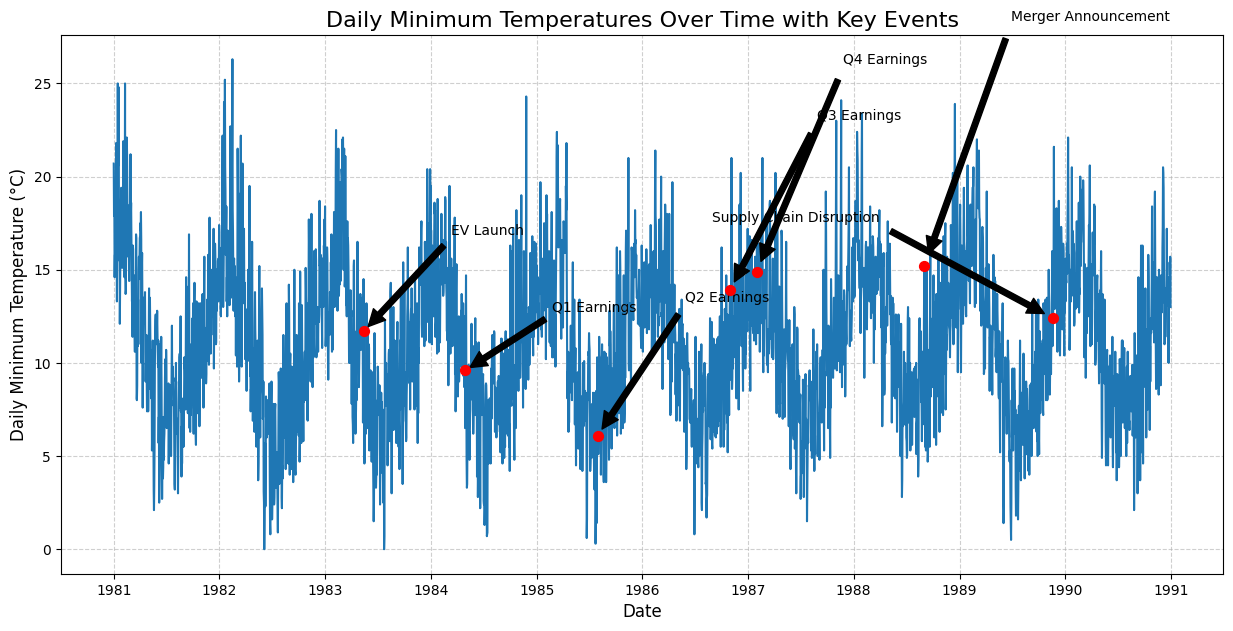

In [5]:
plt.figure(figsize=(15, 7))
plt.plot(df['Date'], df['Daily minimum temperatures'])

# Add titles and labels
plt.title('Daily Minimum Temperatures Over Time with Key Events', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Minimum Temperature (°C)', fontsize=12)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Highlight important points (using the event temperatures and dates from the previous step)
plt.scatter([ev_launch_date, q1_earnings_date, q2_earnings_date, q3_earnings_date, q4_earnings_date, merger_announcement_date, supply_chain_disruption_date],
            [ev_launch_temp, q1_earnings_temp, q2_earnings_temp, q3_earnings_temp, q4_earnings_temp, merger_announcement_temp, supply_chain_disruption_temp],
            color='red', s=50, zorder=5)

# Add annotations
plt.annotate('EV Launch', xy=(ev_launch_date, ev_launch_temp), xytext=(ev_launch_date + pd.Timedelta(days=300), ev_launch_temp + 5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', verticalalignment='bottom')

plt.annotate('Q1 Earnings', xy=(q1_earnings_date, q1_earnings_temp), xytext=(q1_earnings_date + pd.Timedelta(days=300), q1_earnings_temp + 3),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', verticalalignment='bottom')

plt.annotate('Q2 Earnings', xy=(q2_earnings_date, q2_earnings_temp), xytext=(q2_earnings_date + pd.Timedelta(days=300), q2_earnings_temp + 7),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', verticalalignment='bottom')

plt.annotate('Q3 Earnings', xy=(q3_earnings_date, q3_earnings_temp), xytext=(q3_earnings_date + pd.Timedelta(days=300), q3_earnings_temp + 9),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', verticalalignment='bottom')

plt.annotate('Q4 Earnings', xy=(q4_earnings_date, q4_earnings_temp), xytext=(q4_earnings_date + pd.Timedelta(days=300), q4_earnings_temp + 11),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', verticalalignment='bottom')

plt.annotate('Merger Announcement', xy=(merger_announcement_date, merger_announcement_temp), xytext=(merger_announcement_date + pd.Timedelta(days=300), merger_announcement_temp + 13),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', verticalalignment='bottom')

plt.annotate('Supply Chain Disruption', xy=(supply_chain_disruption_date, supply_chain_disruption_temp), xytext=(supply_chain_disruption_date - pd.Timedelta(days=600), supply_chain_disruption_temp + 5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='right', verticalalignment='bottom')

plt.show()

## Summary:

### Data Analysis Key Findings

*   The provided dataset contains daily minimum temperatures from 1981 to 1990, not stock price data as implied by the initial task description.
*   The data cleaning process successfully converted the 'Date' column to datetime objects and the 'Daily minimum temperatures' column to a numeric format.
*   Three rows were removed due to missing or invalid data during the cleaning process, resulting in 3647 entries remaining in the dataset.
*   A time series plot of daily minimum temperatures over time was generated and enhanced with a title, axis labels, gridlines, and annotations for arbitrarily selected key event dates within the dataset's timeframe.

### Insights or Next Steps

*   The analysis focused on daily minimum temperatures due to the dataset provided, which does not align with the initial task of analyzing stock prices. To perform the intended stock price analysis, the correct dataset for Global Motors Inc. stock prices needs to be obtained and used.
*   Once the correct stock price data is available, the steps for data cleaning, time series plotting, and annotation can be applied to visualize and analyze the actual stock performance in relation to the specified key events.
